# Análise Online Sales Dataset
Por: Natan Carvalho <br>
Análise para fins de prática de pandas, matplotlib e numpy. <br>
Fonte: https://www.kaggle.com/datasets/yusufdelikkaya/online-sales-dataset <br>

___
Verificado o dataset, os separadores estão sendo feitos pelas vírgulasm não sendo necessário indicar um separador especifíco na hora de carregar o dataset. 

## Importação de bibliotecas e configurações iniciais.

In [4]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [5]:
# Configurando bibliotecas
pd.set_option('display.max_columns', 25) # Configurando quantidade de colunas exibidas
pd.set_option('display.precision', 8) # Configurando casas decimais para 8
warnings.filterwarnings("ignore") # Desativando avisos futuros

## Carregando dataset e fazendo verificações primárias

In [7]:
# carregando dataset
df = pd.read_csv('./Dataset/online_sales_dataset.csv')
# Exibindo cabeçalho dataset
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High


In [8]:
# Verificando rodapé do dataset
df.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00,85.25,21825.0,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00,39.64,43199.0,United Kingdom,0.31,paypall,28.56,Apparel,Online,Not Returned,Royal Mail,London,Medium
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00,38.27,53328.0,France,0.10,Credit Card,9.13,Stationery,Online,Not Returned,UPS,Rome,Low


In [9]:
# Verificando informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

___
Verificado que a coluna de data não está no formato correto e temos diversos atributos que podem ser convertidos para o Dtype `'Category'` para otimizar o processamento das informações e ganhar mais rapidez no processamento delas. Os atributos com valores faltantes serão investigados mais adiante.

In [11]:
# Convertendo data para o formato correto
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%Y-%m-%d %H:%M', errors = 'coerce')

In [12]:
# Verificando se houve algum erro na conversão
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 49782 entries, 0 to 49781
Series name: InvoiceDate
Non-Null Count  Dtype         
--------------  -----         
49782 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 389.1 KB


In [13]:
# Verificando valores nulos
df.isna().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

___
O **CustomerID** pode estar em branco sem problemas, vamos substituí-lo pelo número 1 apenas para seguir a formatação do atributo.

In [15]:
# Verificando se há algum cliente com o ID 1
df['CustomerID'].value_counts().to_frame().sort_index()

,count
CustomerID,
10001.0,1
10003.0,1
10005.0,2
10008.0,1
10009.0,1
...,...
99986.0,2
99989.0,1
99993.0,1


In [16]:
# Substituindo vazio do CustomerID pelo número 1
df['CustomerID'].fillna(1, inplace = True)

In [17]:
# Criando coluna que informa se o cliente é cadastrado ou não
df['Registred'] = df['CustomerID'].apply(lambda x : 'No' if x == 1 else 'Yes')

___
Verificando coluna ShippingCost

In [19]:
# Verificando estatística da coluna 'ShippingCost'
df['ShippingCost'].describe()

count    47293.00000000
mean        17.49452921
std          7.22055656
min          5.00000000
25%         11.22000000
50%         17.50000000
75%         23.72000000
max         30.00000000
Name: ShippingCost, dtype: float64

Como a média e a mediana são próximas, vamos substituir os valores vazios pela média

In [21]:
# Substituindo valores vazios
df['ShippingCost'].fillna(df['ShippingCost'].mean(), inplace = True)

___
Verificando valores da coluna WarehouseLocation

In [23]:
# Verificancdo ospossíveis valores
df['WarehouseLocation'].value_counts(normalize = True, dropna = False) * 100

WarehouseLocation
Amsterdam    18.99883492
London       18.54083805
Rome         18.53280302
Berlin       18.50066289
Paris        18.42633884
NaN           7.00052228
Name: proportion, dtype: float64

In [24]:
# Filtrando valores nulos na coluna WarehouseLocation
mask = df['WarehouseLocation'].isnull()

In [25]:
# Verificando se há algum padrão com as colunas que não tem valor preenchido na coluna 'WarehouseLocation'
df[mask].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Registred
44368,997724,SKU_1662,Wireless Mouse,-12,2025-01-22 16:00:00,94.54,1.0,Norway,0.45000000,Credit Card,17.49452921,Apparel,Online,Not Returned,FedEx,NaN,Medium,No
25684,246004,SKU_1363,Backpack,-31,2022-12-06 04:00:00,-25.95,1.0,Australia,1.94100505,Credit Card,17.49452921,Furniture,In-store,Not Returned,UPS,NaN,Medium,No
16730,199919,SKU_1675,T-shirt,10,2021-11-28 02:00:00,58.85,1.0,Germany,0.10000000,Bank Transfer,6.03000000,Electronics,Online,Not Returned,Royal Mail,NaN,High,No
49109,713556,SKU_1307,T-shirt,-3,2025-08-08 05:00:00,-21.15,1.0,United Kingdom,1.39459712,Bank Transfer,17.49452921,Stationery,Online,Not Returned,UPS,NaN,Low,No
37147,475876,SKU_1967,Blue Pen,-24,2024-03-27 19:00:00,-6.61,1.0,United States,0.27000000,Credit Card,17.49452921,Apparel,In-store,Returned,Royal Mail,NaN,Low,No
42786,820603,SKU_1639,Blue Pen,-29,2024-11-17 18:00:00,25.20,1.0,Netherlands,0.18000000,paypall,17.49452921,Accessories,In-store,Not Returned,Royal Mail,NaN,Medium,No
38139,188966,SKU_1112,Desk Lamp,-20,2024-05-08 03:00:00,64.09,1.0,Portugal,0.11000000,paypall,17.49452921,Stationery,Online,Not Returned,Royal Mail,NaN,Medium,No
4775,924837,SKU_1552,Desk Lamp,-38,2020-07-17 23:00:00,-1.36,1.0,Portugal,1.76715952,Credit Card,17.49452921,Electronics,In-store,Not Returned,Royal Mail,NaN,High,No
7096,815879,SKU_1344,Notebook,-20,2020-10-22 16:00:00,-54.77,1.0,Portugal,0.33000000,Bank Transfer,17.49452921,Stationery,Online,Not Returned,UPS,NaN,High,No
7598,355493,SKU_1284,Wireless Mouse,22,2020-11-12 14:00:00,6.19,1.0,France,0.22000000,Bank Transfer,20.53000000,Furniture,In-store,Not Returned,FedEx,NaN,Low,No


___
Como não detectamos nenhum padrão da coluna em questão e para não influenciar as análises futuras vamos preencher os valores vazio com o texto "undefined"

In [27]:
# Substituindo valore nulos
df['WarehouseLocation'].fillna('Undefined', inplace = True)

In [28]:
# Verificando se ainda há valores nulos
df.isna().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
Registred            0
dtype: int64

___
Convertendo atributos para category, para melhorar a eficiência das análises.

In [30]:
# Colocando em uma lista todos as colunas do tipo object
catcol = df.select_dtypes('object').columns.to_list()

In [31]:
# Exibindo lista
catcol

['StockCode',
 'Description',
 'Country',
 'PaymentMethod',
 'Category',
 'SalesChannel',
 'ReturnStatus',
 'ShipmentProvider',
 'WarehouseLocation',
 'OrderPriority',
 'Registred']

Das colunas acima não vamos converter as nomeadas; 'StockCode' e 'Description', portando vamos exclui-lás da lista.

In [33]:
# Excluindo colunas que não vão ser convertidas da lista
catcol.pop(0)

'StockCode'

In [34]:
# Excluindo a outra coluna
catcol.pop(0)

'Description'

In [35]:
# Exibindo lista atualizada
catcol

['Country',
 'PaymentMethod',
 'Category',
 'SalesChannel',
 'ReturnStatus',
 'ShipmentProvider',
 'WarehouseLocation',
 'OrderPriority',
 'Registred']

In [36]:
# Convertendo colunas para Dtype category
for c in catcol:
    df[c] = df[c].astype("category")

In [37]:
# Alterando o CustomerID para int
df['CustomerID'] = df['CustomerID'].astype('int64')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   InvoiceNo          49782 non-null  int64         
 1   StockCode          49782 non-null  object        
 2   Description        49782 non-null  object        
 3   Quantity           49782 non-null  int64         
 4   InvoiceDate        49782 non-null  datetime64[ns]
 5   UnitPrice          49782 non-null  float64       
 6   CustomerID         49782 non-null  int64         
 7   Country            49782 non-null  category      
 8   Discount           49782 non-null  float64       
 9   PaymentMethod      49782 non-null  category      
 10  ShippingCost       49782 non-null  float64       
 11  Category           49782 non-null  category      
 12  SalesChannel       49782 non-null  category      
 13  ReturnStatus       49782 non-null  category      
 14  Shipme

___
Verifique que o usa de memória foi de 6.5+ MB para 3.8+ MB

## Explorando dataset
Verificando se ainda há algum ajuste a ser feito.

In [41]:
# Verificando amostra aleatória de registros
df.sample(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Registred
45645,869820,SKU_1726,White Mug,36,2025-03-16 21:00:00,17.16,25411,Australia,0.11000000,Bank Transfer,5.27000000,Stationery,In-store,Not Returned,FedEx,London,High,Yes
32914,446429,SKU_1853,White Mug,1,2023-10-03 10:00:00,61.56,84712,Spain,0.27000000,Credit Card,24.29000000,Apparel,Online,Not Returned,DHL,Paris,Low,Yes
22759,262650,SKU_1854,Notebook,38,2022-08-06 07:00:00,51.53,85057,Portugal,0.34000000,paypall,6.07000000,Electronics,In-store,Not Returned,UPS,Paris,High,Yes
4458,826481,SKU_1526,USB Cable,5,2020-07-04 18:00:00,32.14,99868,Sweden,0.02000000,Credit Card,12.98000000,Electronics,In-store,Not Returned,FedEx,London,Low,Yes
24602,547158,SKU_1181,Wireless Mouse,5,2022-10-22 02:00:00,87.19,92003,United Kingdom,0.14000000,Credit Card,21.39000000,Electronics,Online,Not Returned,DHL,Paris,Low,Yes
23582,481335,SKU_1092,White Mug,38,2022-09-09 14:00:00,18.87,59857,Portugal,0.05000000,Credit Card,24.45000000,Accessories,In-store,Not Returned,UPS,Rome,High,Yes
26655,976650,SKU_1168,Backpack,47,2023-01-15 15:00:00,30.00,71684,Sweden,0.17000000,Credit Card,7.57000000,Accessories,In-store,Returned,UPS,London,High,Yes
17227,307358,SKU_1113,Office Chair,24,2021-12-18 19:00:00,61.46,56137,United Kingdom,0.07000000,paypall,6.63000000,Stationery,Online,Not Returned,Royal Mail,Paris,High,Yes
19683,139244,SKU_1507,Headphones,-44,2022-03-31 03:00:00,-1.29,1,Germany,0.31000000,Credit Card,17.49452921,Apparel,In-store,Returned,UPS,Undefined,Low,No
45461,682463,SKU_1518,Notebook,23,2025-03-09 05:00:00,26.52,49144,Australia,0.12000000,Bank Transfer,19.27000000,Electronics,Online,Not Returned,Royal Mail,Rome,Low,Yes


## Mais alguns ajustes
* Verificado que os itens estão com a categoria incorreta, por exemplo White Mug categorizado como Eletronics
* Verificado que na coluna 'Quantity' e 'UnitPrice' pode haver valores negativos
* Criar coluna com o valor total do pedido
* Criar coluna com desconto total do pedido
* Criar coluna para Ano
* Criar coluna para mês

In [43]:
# Convertendo valores negativos da coluna Quantity
df['Quantity'] = df['Quantity'].apply(lambda x: x * -1 if x < 0 else x)

In [44]:
# Convertendo valores negativos da coluna UnitPrice
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: x * -1 if x < 0 else x)

In [45]:
# Criando coluna com valor total do pedido
df['Total'] = df['Quantity'] * df['UnitPrice']

In [46]:
# Criando Coluna com o desconto total
df['TotalDiscount'] = df['Discount'] * df['Quantity']

In [47]:
# Criando coluna com o ano
df['Year'] = df['InvoiceDate'].dt.strftime('%Y')

In [48]:
# Criando coluna com o mês
df['Month'] = df['InvoiceDate'].dt.strftime('%m')

In [49]:
# Verificando valores unicos do description
df['Description'].unique()

array(['White Mug', 'Headphones', 'Desk Lamp', 'USB Cable',
       'Office Chair', 'Notebook', 'Wireless Mouse', 'Blue Pen',
       'Wall Clock', 'T-shirt', 'Backpack'], dtype=object)

In [50]:
# Verificando categorias únicas
df['Category'].unique()

['Apparel', 'Electronics', 'Accessories', 'Stationery', 'Furniture']
Categories (5, object): ['Accessories', 'Apparel', 'Electronics', 'Furniture', 'Stationery']

In [51]:
df['Category'] = df['Description'].apply(lambda x: 'Apparel' if x == 'T-shirt'
                                         else ('Apparel' if x == 'Backpack'
                                              else ('Electronics' if x == 'Headphones'
                                                   else ('Electronics' if x == 'Wireless Mouse'
                                                        else ('Electronics' if x == 'Desk Lamp'
                                                             else ('Acessories' if x == 'White Mug'
                                                                  else ('Acessories' if x == 'USB Cable'
                                                                       else ('Stationery' if x == 'Notebook'
                                                                            else ('Stationery' if x == 'Blue Pen'
                                                                                 else ('Furniture' if x == 'Office Chair'
                                                                                      else ('Electronics' if x == 'Wall Clock' else '')))))))))))

In [52]:
# Verificando alterações
df.sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Registred,Total,TotalDiscount,Year,Month
6707,859401,SKU_1358,Notebook,32,2020-10-06 11:00:00,73.29,87227,Australia,0.32000000,Bank Transfer,9.57000000,Stationery,In-store,Not Returned,UPS,Berlin,High,Yes,2345.28,10.24000000,2020,10
42511,143251,SKU_1540,Notebook,35,2024-11-06 07:00:00,70.18,24889,Belgium,0.42000000,Bank Transfer,26.56000000,Stationery,In-store,Not Returned,FedEx,Amsterdam,High,Yes,2456.30,14.70000000,2024,11
26158,689215,SKU_1116,Backpack,38,2022-12-25 22:00:00,52.61,84772,Italy,0.38000000,Credit Card,27.34000000,Apparel,In-store,Not Returned,DHL,Berlin,Low,Yes,1999.18,14.44000000,2022,12
4448,114743,SKU_1547,T-shirt,47,2020-07-04 08:00:00,36.00,1,Australia,1.33674489,Bank Transfer,17.49452921,Apparel,Online,Not Returned,Royal Mail,Undefined,Low,No,1692.00,62.82700971,2020,07
28715,574677,SKU_1395,Backpack,37,2023-04-11 11:00:00,31.93,17641,United States,0.40000000,paypall,11.56000000,Apparel,Online,Returned,Royal Mail,Berlin,High,Yes,1181.41,14.80000000,2023,04
26892,825750,SKU_1860,White Mug,33,2023-01-25 12:00:00,78.07,1,France,1.39547030,Bank Transfer,17.49452921,Acessories,In-store,Not Returned,DHL,Undefined,Medium,No,2576.31,46.05051980,2023,01
47059,430400,SKU_1461,Wall Clock,14,2025-05-14 19:00:00,12.04,50980,United Kingdom,0.02000000,paypall,29.47000000,Electronics,In-store,Not Returned,DHL,Berlin,Medium,Yes,168.56,0.28000000,2025,05
42570,316396,SKU_1962,White Mug,14,2024-11-08 18:00:00,24.69,16053,Germany,0.03000000,paypall,14.77000000,Acessories,In-store,Not Returned,FedEx,Berlin,Medium,Yes,345.66,0.42000000,2024,11
723,449652,SKU_1378,T-shirt,11,2020-01-31 03:00:00,94.78,66502,France,0.29000000,Bank Transfer,9.52000000,Apparel,In-store,Not Returned,UPS,Berlin,High,Yes,1042.58,3.19000000,2020,01
34595,584789,SKU_1174,Office Chair,5,2023-12-12 11:00:00,38.46,83898,Belgium,0.06000000,paypall,9.23000000,Furniture,In-store,Not Returned,FedEx,Amsterdam,Low,Yes,192.30,0.30000000,2023,12


## Salvando dataset tratado

In [54]:
df.to_csv('./Dataset/onlinse_sales_tratado.csv', index = False)

## Análise exploratória

### 1 - Qual faturamento por ano?

In [57]:
# Agrupando faturamento por ano
fat_ano = df.groupby(['Year'])['Total'].sum()
# Exibindo Series
fat_ano

Year
2020    11025201.12
2021    11017981.49
2022    10918312.08
2023    11025687.55
2024    11170066.82
2025     7565815.15
Name: Total, dtype: float64

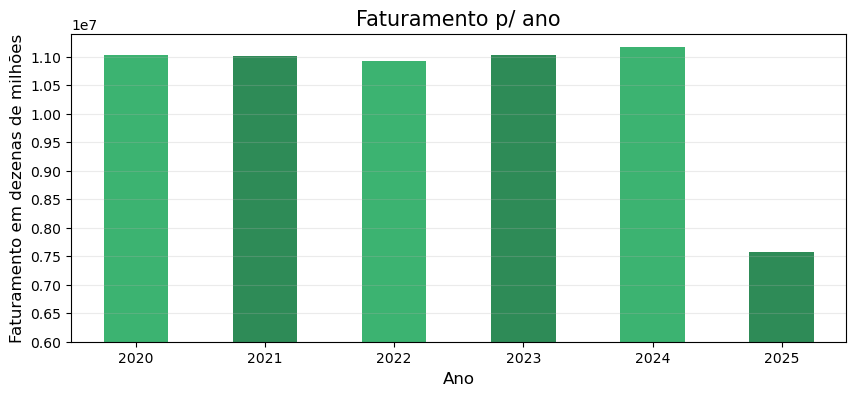

In [58]:
fig, ax = plt.subplots(figsize = (10, 4))
fat_ano.plot(
             kind = 'bar',
             ylim = (6000000, 11400000),
             color = ('mediumseagreen', 'seagreen'),
             rot = 0,
            yticks = (np.arange(6000000, 12000000, step = 500000))
            );
ax.set_title('Faturamento p/ ano', fontsize = 15)
ax.set_xlabel('Ano', fontsize = 12)
ax.set_ylabel('Faturamento em dezenas de milhões', fontsize = 12)
ax.grid(True, axis = 'y', alpha = 0.25)
plt.show;

Verificamos que o faturamento entre 2020-2024 não tem grandes alterações conforme mostra o gráfico acima. Devido ao faturamento do ano de 2025 estar baixo, vamos verificar se houve venda em todos os meses para esse ano.

In [60]:
# Verificando vendas por ano e mês
fat_mes = df.pivot_table(
    index = 'Year',
    columns = 'Month',
    values = 'Total',
    aggfunc = 'sum'
).sort_values(by = 'Year').style.background_gradient(cmap = 'Blues')
# Exibindo resultado
fat_mes

Month,01,02,03,04,05,06,07,08,09,10,11,12
Year,,,,,,,,,,,,
2020,916092.000000,877644.530000,914845.010000,931000.980000,922258.490000,918029.050000,902802.510000,928509.270000,935238.460000,906561.630000,956631.790000,915587.400000
2021,941220.190000,864456.090000,953094.370000,883968.090000,926559.410000,923529.270000,890741.490000,911530.580000,955681.420000,940018.740000,880947.640000,946234.200000
2022,960046.220000,812982.220000,935406.450000,877855.740000,894544.230000,926237.020000,947156.600000,952452.180000,832713.940000,973287.230000,894977.530000,910652.720000
2023,942004.810000,835947.150000,953625.380000,877089.340000,916364.390000,886373.870000,921683.080000,908132.950000,908779.210000,956519.010000,927991.890000,991176.470000
2024,905044.100000,869240.380000,929601.310000,919245.890000,968748.430000,890035.400000,952096.570000,984933.660000,945102.570000,933190.600000,946640.010000,926187.900000
2025,962952.200000,883262.880000,963184.420000,922038.610000,930388.950000,873976.970000,915647.680000,987855.900000,126507.540000,nan,nan,nan


Possível notar que não há registros de venda para os meses 10, 11 e 12 do ano de 2025 e no mês 9 o valor parece baixo em relação aos outros, vamos verificar se há registro de todos os dias do mês.

In [62]:
df.query("Year == '2025' & Month == '09'").sort_values(by = 'InvoiceDate', ascending = False).head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,Registred,Total,TotalDiscount,Year,Month
49781,772215,SKU_1832,White Mug,30,2025-09-05 05:00:00,38.27,53328,France,0.10,Credit Card,9.13,Acessories,Online,Not Returned,UPS,Rome,Low,Yes,1148.10,3.00,2025,09
49780,701213,SKU_1602,Notebook,48,2025-09-05 04:00:00,39.64,43199,United Kingdom,0.31,paypall,28.56,Stationery,Online,Not Returned,Royal Mail,London,Medium,Yes,1902.72,14.88,2025,09
49779,177622,SKU_1766,Office Chair,43,2025-09-05 03:00:00,85.25,21825,Portugal,0.20,Bank Transfer,16.26,Furniture,In-store,Not Returned,FedEx,London,High,Yes,3665.75,8.60,2025,09


Confirmada a suspeita de que o mês 9 não possui de venda para todos os dias, tendo registros apenas até o dia 5.

### 2 - Qual percentual do pedidos separados por clientes cadastrados e não cadastrados?

In [65]:
# Contando valores
cadastro = df['Registred'].value_counts()
# Exibindo resultado
cadastro

Registred
Yes    44804
No      4978
Name: count, dtype: int64

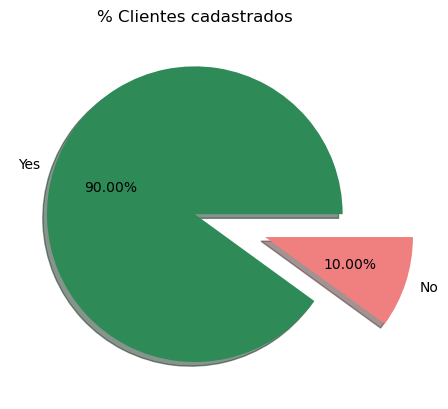

In [66]:
# Plotando gráfico
cadastro.plot(
    kind = 'pie',
    colors = ('seagreen', 'lightcoral'),
    title = '% Clientes cadastrados',
    ylabel = '',
    autopct = '%1.2f%%',
    shadow = True,
    explode = (0.00, 0.50)
);

### 3 - Qual a média de desconto por tipo de cliente?

In [68]:
df.groupby('Registred')['TotalDiscount'].describe()

,count,mean,std,min,25%,50%,75%,max
Registred,,,,,,,,
No,4978.0,12.65649786,16.94723430,0.0,2.45610247,6.58,14.4,99.43645722
Yes,44804.0,6.23475783,5.44719363,0.0,1.75000000,4.68,9.5,24.50000000


Os clientes **não** registrados estão recebendo mais desconto do que os registrados.

### 4 - Quantos pedidos sairam sem desconto nos anos de 2022 à 2024?

In [71]:
# Filtrando informações
semdesconto = df.query("Year >= '2022' & Year <= '2024' & TotalDiscount == 0").groupby('Year')['InvoiceNo'].count()
# Exibindo valores
semdesconto

Year
2022    105
2023     75
2024     79
Name: InvoiceNo, dtype: int64

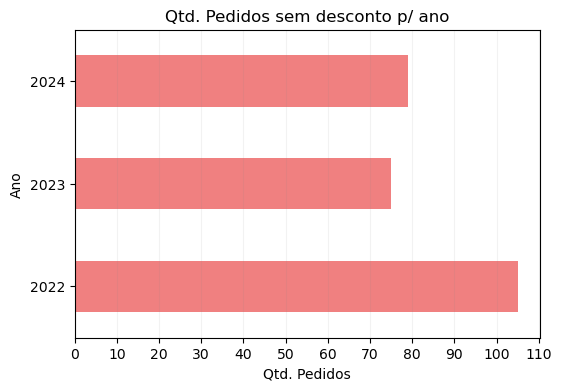

In [72]:
# Plotrando gráfico
semdesconto.plot(
    figsize = (6,4),
    title = 'Qtd. Pedidos sem desconto p/ ano',
    kind = 'barh',
    color = 'lightcoral',
    ylabel = 'Ano',
    xlabel = 'Qtd. Pedidos',
    xticks = (np.arange(0, max(semdesconto) + 10, step = 10))
);
plt.grid(True, axis = 'x', alpha = 0.10, c = 'grey')

### 5 - Qual a quantidade de pedidos feitos por um mesmo cliente ao longo dos anos?

In [74]:
# Agrupando clientes cadastrados e contando quantos pedidos cada um fez
registrados = df.query("CustomerID != 1").groupby(['CustomerID', 'Year'], as_index = False)['InvoiceNo'].count()
# Exibindo resultado
registrados

,CustomerID,Year,InvoiceNo
0,10001,2023,1
1,10003,2020,1
2,10005,2024,2
3,10008,2025,1
4,10009,2020,1
...,...,...,...
42935,99989,2025,1
42936,99993,2024,1
42937,99997,2021,1
42938,99998,2022,1


In [75]:
# Resumindo quantidade de pedidos por ano
pedidos_p_ano = registrados.pivot_table(
    index = 'Year',
    columns = 'InvoiceNo',
    values = 'CustomerID',
    aggfunc = 'count'
)
# Exibindo resultado
pedidos_p_ano

InvoiceNo,1,2,3
Year,,,
2020,7251,330,7
2021,7239,324,12
2022,7196,330,14
2023,7210,305,5
2024,7252,318,7
2025,4975,163,2


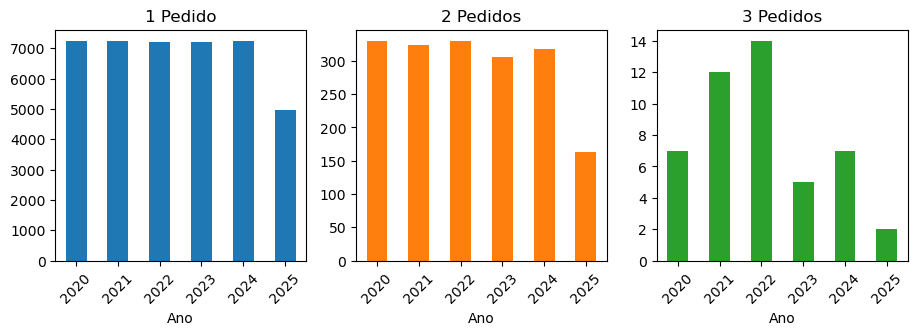

In [76]:
# Plotando gráfico
pedidos_p_ano.plot(
    figsize = (11, 3),
    title = ('1 Pedido', '2 Pedidos', '3 Pedidos'),
    xlabel = ('Ano'),
    kind = 'bar',
    subplots = (True),
    layout = (1, 3),
    sharex = False,
    legend = False,
    rot = 45
);

Possível notar que **menos de 10% dos clientes** chegam a fazer um segundo pedido e **menos de 0,5%** chegam a fazer três pedidos em um mesmo ano, quando comparados em relação aos que fizeram apenas um pedido durante os anos.

### 6 - Quantos pedidos com valor total acima da média foram enviados por armazém/depósito?

In [79]:
# Filtrando pesquisa
ped_acima_media = df.query("Total > Total.mean()").groupby('WarehouseLocation')['InvoiceNo'].count().sort_values()
# Exibindo resultado da pesquisa
ped_acima_media

WarehouseLocation
Undefined    1412
Berlin       3708
London       3716
Rome         3720
Paris        3730
Amsterdam    3776
Name: InvoiceNo, dtype: int64

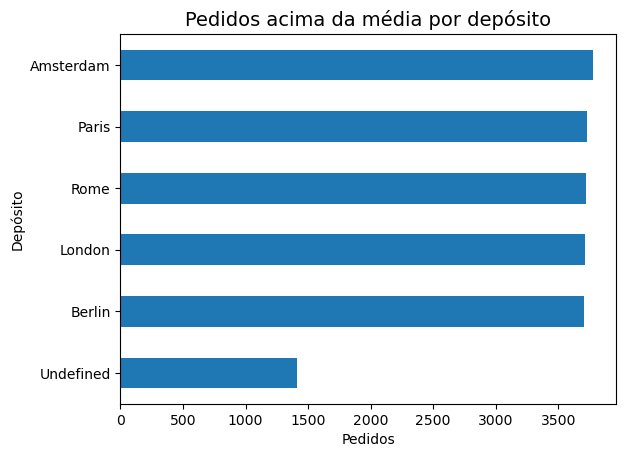

In [80]:
# Plotando gráfico
fig, ax = plt.subplots()
ped_acima_media.plot.barh()
ax.set_title('Pedidos acima da média por depósito', fontsize = 14)
ax.set_xlabel('Pedidos')
ax.set_ylabel('Depósito')
plt.show;

### 7 - Qual faturamento por canal de venda separados pelas categorias?

In [82]:
# Agrupando faturamento por canal de vendas
fat_canal = df.query("ReturnStatus == 'Not Returned'").pivot_table(
    index = 'Category',
    columns = 'SalesChannel',
    values = 'Total',
    aggfunc = 'sum'
)
# Exibindo resultado
fat_canal

SalesChannel,In-store,Online
Category,,
Acessories,5193325.41,5297942.79
Apparel,5125741.74,5067451.92
Electronics,10328741.68,10363653.84
Furniture,2559527.55,2545160.74
Stationery,5023594.93,5129890.61


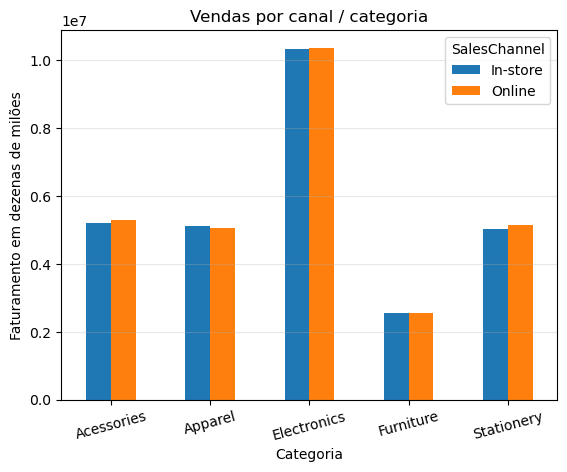

In [83]:
# Plotando gráfico
fat_canal.plot.bar(
    rot = 15
)
plt.grid(True, alpha = 0.3, axis ='y')
plt.xlabel('Categoria')
plt.ylabel('Faturamento em dezenas de milões')
plt.title('Vendas por canal / categoria');

### 8 - Quais produtos com mais retorno em ordem de faturamento?

In [85]:
# Filtrando dados
ret_prod = df.query("ReturnStatus == 'Returned'").groupby('Category')['Total'].sum().sort_values()
# exibindo resultado
ret_prod

Category
Furniture       513626.64
Apparel        1108191.26
Acessories     1149424.13
Stationery     1156083.32
Electronics    2160707.65
Name: Total, dtype: float64

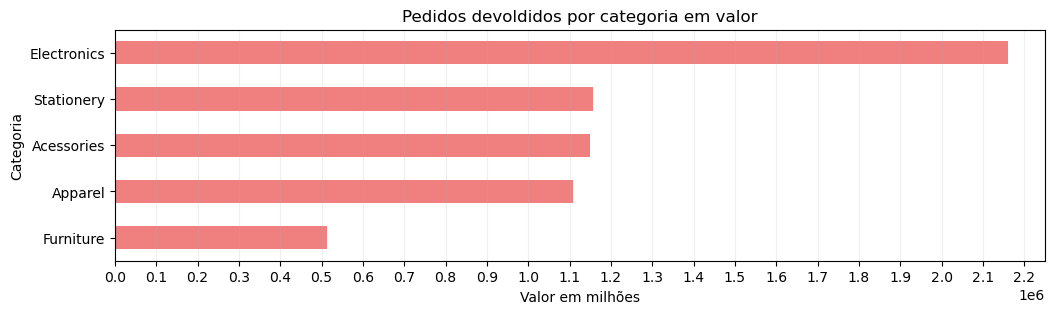

In [86]:
# Plotando gráfico
ret_prod.plot.barh(title = ('Pedidos devoldidos por categoria em valor'), color = ('lightcoral'),
                  xlabel = ('Valor em milhões'), ylabel = ('Categoria'), figsize = (12, 3))
plt.xlim(0, 2250000)
plt.xticks(np.arange(0, 2250000, step = 100000))
plt.grid(True, alpha = 0.2, axis = 'x');

### 9 - Qual valor gasto com pedidos que retornaram separados por transportadora?

In [88]:
# Filtrando inforamções
gasto_transporte = df.query("ReturnStatus == 'Returned'").groupby('ShipmentProvider')['ShippingCost'].sum()
# Exibindo resultado
gasto_transporte

ShipmentProvider
DHL           21509.15269427
FedEx         21480.08269427
Royal Mail    21860.86704481
UPS           20690.97081111
Name: ShippingCost, dtype: float64

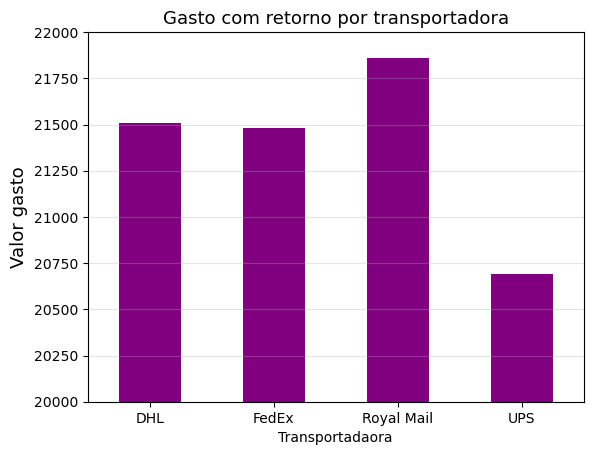

In [89]:
# Plotando gráfico
gasto_transporte.plot(
    kind = 'bar', 
    ylim = (20000, 22000), 
    rot = 0, 
    color = 'purple');
plt.xlabel('Transportadaora')
plt.ylabel('Valor gasto', fontsize = 13)
plt.title('Gasto com retorno por transportadora', fontsize = 13)
plt.grid(True, alpha = 0.32, axis = 'y');

### 10 - Quais países com os maiores números de cliente registrados

In [91]:
# Reunindo informações
registrados_pais = df.query("CustomerID != 1").groupby('Country', as_index = False)['CustomerID'].count().sort_values(by = 'CustomerID', ascending = False)
# Exibindo resultado
registrados_pais

,Country,CustomerID
2,France,3820
9,Sweden,3771
3,Germany,3763
5,Netherlands,3753
7,Portugal,3747
1,Belgium,3745
6,Norway,3740
10,United Kingdom,3735
8,Spain,3700
0,Australia,3698


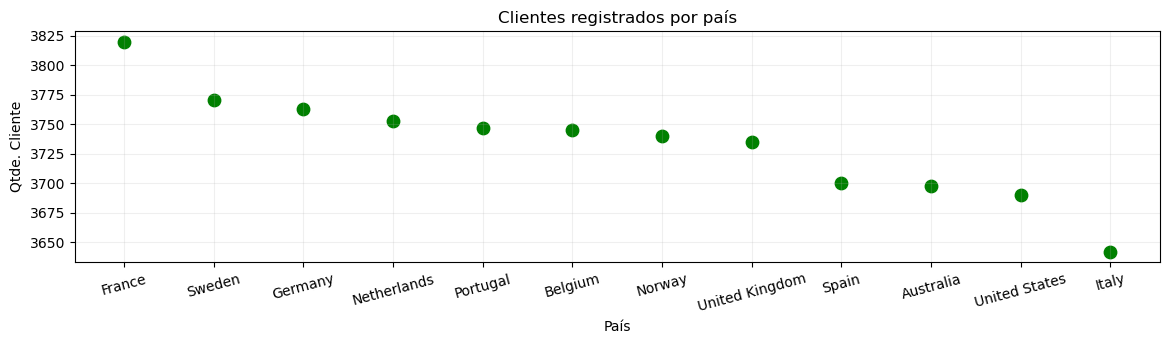

In [92]:
# Plotando gráfico
registrados_pais.plot(
    figsize = (14, 3),
    color = 'g',
    s = 80,
    kind = 'scatter',
    x = 'Country',
    y = 'CustomerID',
    rot = 15
);
plt.grid(True, alpha = 0.2)
plt.title('Clientes registrados por país')
plt.xlabel('País')
plt.ylabel('Qtde. Cliente');

### 11 - Quais produtos da categoria Electronics com mais venda?

In [94]:
# Agrupando produtos
prod_electronics = df.query("Category == 'Electronics'").groupby('Description')['Total'].sum().sort_values()
# Exibindo resultado
prod_electronics

Description
Wireless Mouse    5673697.97
Desk Lamp         5690337.83
Headphones        5698792.08
Wall Clock        5790275.29
Name: Total, dtype: float64

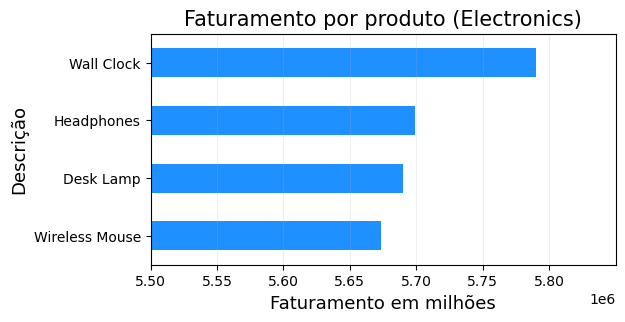

In [95]:
# Plotando gráfico
prod_electronics.plot.barh(
    figsize = (6, 3),
    xticks = (np.arange(5500000, 5850000, step = 50000)),
    xlim = (5500000, 5850000),
    color = ('dodgerblue')
)
plt.xlabel('Faturamento em milhões', fontsize = 13)
plt.ylabel('Descrição', fontsize = 13)
plt.title('Faturamento por produto (Electronics)', fontsize = 15)
plt.grid(True, axis = 'x', alpha = 0.2);

### 12 - Qual país mais compra Wall Clock?

In [97]:
# Filtrando valores
pais_wall = df.query("Description == 'Wall Clock'").groupby('Country')['Total'].sum().sort_values(ascending = False)
# Exibindo resultado
pais_wall

Country
Portugal          540912.61
Germany           528116.77
Netherlands       510689.04
Sweden            498590.99
Belgium           494559.73
United Kingdom    485019.80
Australia         477402.40
Spain             473662.65
France            463171.14
United States     463031.26
Italy             436942.61
Norway            418176.29
Name: Total, dtype: float64

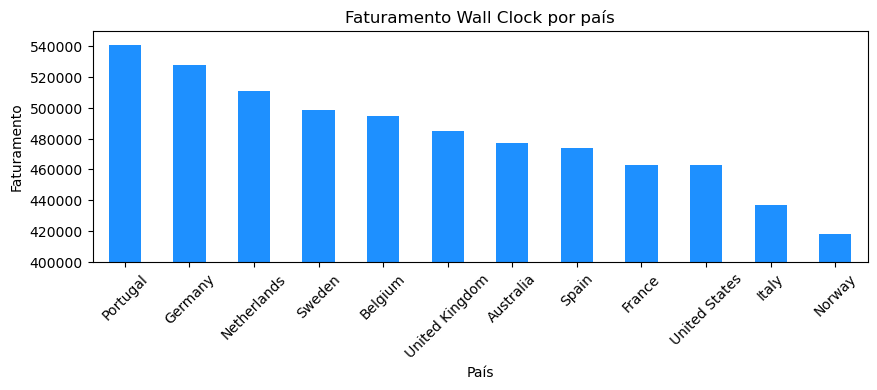

In [98]:
# Plotando gráfico
pais_wall.plot(
    kind = 'bar',
    color = 'dodgerblue',
    figsize = (10, 3),
    rot = 45,
    ylim = (400000, 550000)
)
plt.title('Faturamento Wall Clock por país')
plt.xlabel('País')
plt.ylabel('Faturamento');

### 13 - Qual taxa de retorno do Wall Clock em Portugal?

In [100]:
# Buscando registros
retorno_wall = df.query("Description == 'Wall Clock' & Country == 'Portugal'")['ReturnStatus'].value_counts()
# Exibindo resultados
retorno_wall

ReturnStatus
Not Returned    367
Returned         44
Name: count, dtype: int64

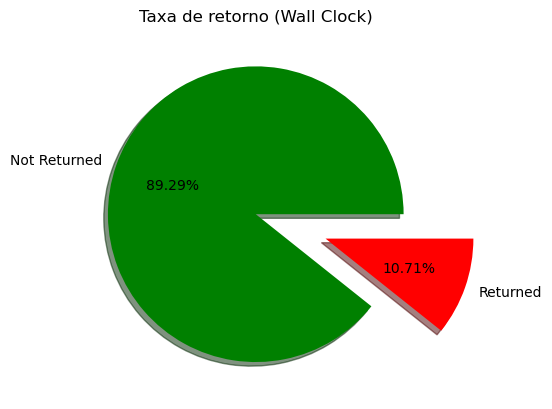

In [101]:
# Plotando gráfico
retorno_wall.plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    ylabel = '',
    explode = (0.00, 0.5),
    shadow = True,
    colors = ('g', 'r')
)
plt.title('Taxa de retorno (Wall Clock)');

### 14 - Qual taxa de retorno do Wall Clock em Germany?

In [103]:
# Buscando registros
retorno_wall_ger = df.query("Description == 'Wall Clock' & Country == 'Germany'")['ReturnStatus'].value_counts()
# Exibindo resultados
retorno_wall_ger

ReturnStatus
Not Returned    334
Returned         45
Name: count, dtype: int64

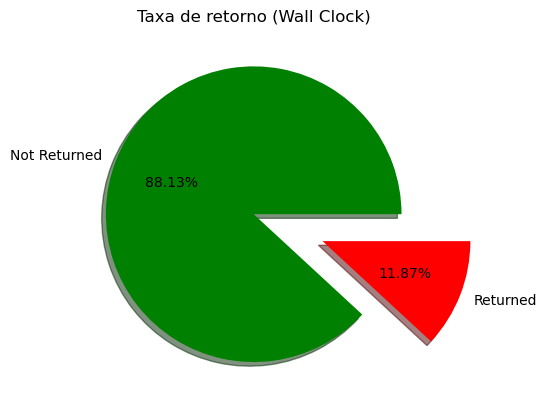

In [104]:
# Plotando gráfico
retorno_wall_ger.plot(
    kind = 'pie',
    autopct = '%1.2f%%',
    ylabel = '',
    explode = (0.00, 0.5),
    shadow = True,
    colors = ('g', 'r')
)
plt.title('Taxa de retorno (Wall Clock)');

### 15 - Qual método de pagamento utilizado com maior faturamento de Wall Clock?

In [106]:
# Buscando informações
pay_wall = df.query("Description == 'Wall Clock' & (Country == 'Portugal' | Country == 'Germany')").groupby('PaymentMethod')['Total'].sum()
# Exibindo resultado
pay_wall

PaymentMethod
Bank Transfer    331462.17
Credit Card      371318.74
paypall          366248.47
Name: Total, dtype: float64

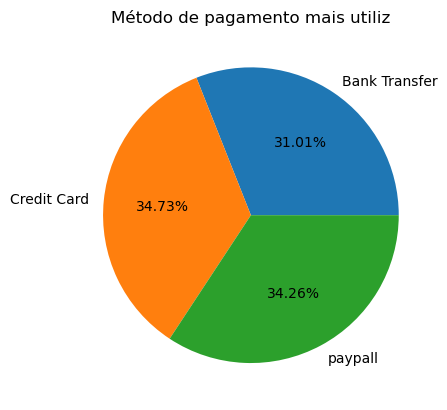

In [107]:
# Plotando gráfico
pay_wall.plot(
    kind = 'pie',
    ylabel = '',
    autopct = '%1.2f%%'
)
plt.title('Método de pagamento mais utiliz');

### 16 - Qual país mais compra para a categoria Furniture

In [109]:
# Filtrando informações
fat_furniture = df.query("Category == 'Furniture'").groupby('Country')['Total'].sum().sort_values(ascending = False)
# Exibindo resultado
fat_furniture / sum(fat_furniture) * 100

Country
Belgium           9.62539937
United Kingdom    9.41299102
Italy             9.31199971
Spain             8.57324458
Australia         8.33487649
Germany           8.17617161
France            8.11472400
Netherlands       8.05529568
Norway            7.87720225
Sweden            7.82945537
Portugal          7.40949831
United States     7.27914161
Name: Total, dtype: float64

## Conclusões

* A empresa analisada encontra-se em um cenário **estável**, onde através das analíses podemos notar que não há muita variação em parâmetros como o faturamento, ou número de clientes.
* A base já consolidada de clientes faz ao menos **um pedido por ano**, mas poucos clientes chegam a fazer 2 ou 3 pedidos no mesmo ano.
* A categoria **Electronics** se destaca no quesito de faturamento em relação às outras, quase dobrando o valor quando comparada.
* O Produto que representa a maior parte do faturamento é o **Wall Clock**, e os países de maior faturamento para o produto são Portugal e Germany que apresentam uma **taxa de retorno** entre eles de 10,71% - 11,87%.
* Uma oportunidade seria fazer uma **campanha de vendas** para o Wall Clock nos países com maior faturamento para o produto, afim de não só aumentar o faturamento, bem como atrair novos clientes.
* Em relação a categoria Furniture pode-se também realizar campanhas em especial nos países **Belgium, United Kingdom e Italy**, que correspondem a pouco mais de 28% do faturamento da categoria. Focando em especial no país Italy que **tem o menor número de clientes**.
* Sobre os canais de venda são **quase equiparados**, com destaque ligeiramente maior para o Online. Apenas para a **categoria Apparel o In-store supera sutilmente o Online**.